In [4]:
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
import plotly.express as px

In this project, we want to predict laptop prices.<br>
Our goal column is "Price_euros", which we want our model to predict.

In [2]:
df = pd.read_csv("laptop_price.csv",  encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   object 
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


### Data Visualization

Text(0.5, 1.0, 'Average Laptop Price Per Company')

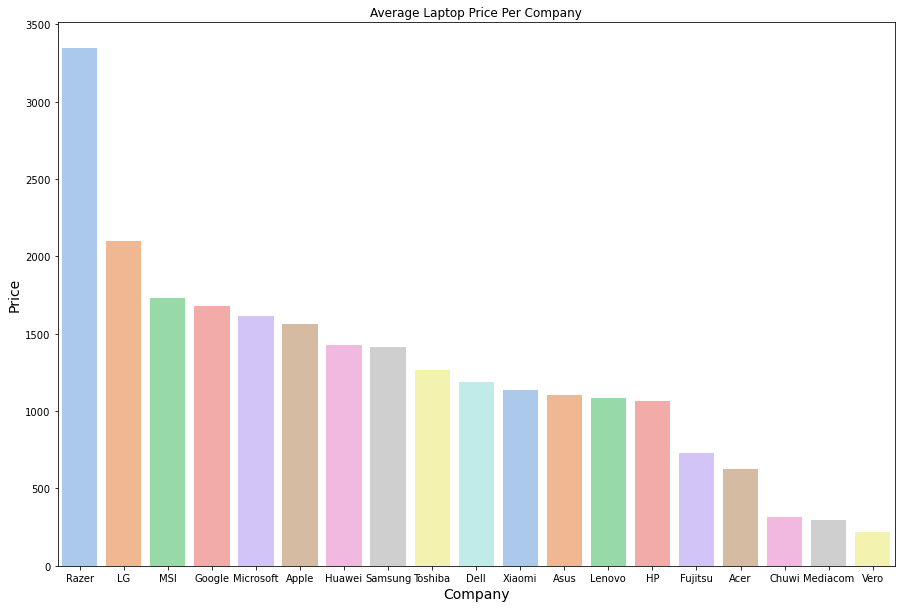

In [19]:
temp = df.groupby(['Company']).mean().reset_index().sort_values(by='Price_euros',ascending=False)
plt.figure(figsize = (15,10))
splot = sns.barplot(data = temp,x = 'Company', y = 'Price_euros', palette="pastel")
plt.xlabel("Company", size=14)
plt.ylabel("Price", size=14)
plt.title('Average Laptop Price Per Company')

In [31]:
#
len(df["Product"].unique())

for col in df.columns.to_list():
    print (col ,"have", len(df[col].unique()), "unique values")

Company have 19 unique values
Product have 618 unique values
TypeName have 6 unique values
Inches have 18 unique values
ScreenResolution have 40 unique values
Cpu have 118 unique values
Ram have 9 unique values
Memory have 39 unique values
Gpu have 110 unique values
OpSys have 9 unique values
Weight have 171 unique values
Price_euros have 791 unique values


In [ ]:
# there is no need for the laptop_ID column
df.drop(columns = 'laptop_ID',inplace = True)

In [ ]:
# removing 'kg' from the 'Weight' column
data['Weight'] = data['Weight'].apply(lambda x: x[:-2]).astype(np.float32)

In [ ]:
data['Memory'] = data['Memory'].str.replace('Flash Storage','FlashStorage')
